## Вариант 9##
Маятник – тело с массой 1 кг, моментом инерции относительно оси a $кг∙м^2$, центр его тяжести находится на расстоянии 5 см от оси, момент силы трения в оси пропорционален угловой скорости вращения с коэффициентом 1;

$$I{d^2\over dt^2}\theta = mgL\theta + M + M^{тр}$$
$$I = I^0+mL^2 = a$$
$$a{d^2\over dt^2}\theta = mgL\theta + M + {d\over dt}\theta$$
$$ (p^2-{p\over a}-{mgL\over a})\theta = {M\over a} $$


In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
m = 1
g = 9.81
a = 10
L = 0.05

In [3]:
dT = 0.1
TotalTime = 20
Tin = np.linspace(0, TotalTime, TotalTime/dT + 1)
# sys_tf = signal.TransferFunction([1/a], [1, -1/a, -m*g*L/a])

# print(sys_tf)

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
sys_tf = signal.tf2ss([1/a], [1, -1/a, -m*g*L/a])
print(sys_tf)

factor = sys_tf[2][0,1]

(array([[0.1    , 0.04905],
       [1.     , 0.     ]]), array([[1.],
       [0.]]), array([[0. , 0.1]]), array([[0.]]))


In [6]:
factor

0.1

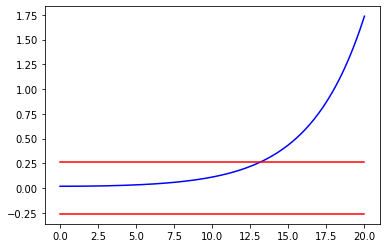

In [7]:
zero_input = np.zeros(Tin.shape) # не будем прилагать момент
start_pos = 1/180.0*np.pi        # начнём с позиции в 1°.

Tout,yout,xout = signal.lsim(sys_tf, zero_input, Tin, X0=[0, start_pos/factor])# начальная скорость нулевая, угол - start_pos
plt.plot(Tout, yout, 'b')
# покажем предельные допустимые отклонения красными линиями
limit = 15 / 180.0 * np.pi
plt.plot([0, TotalTime], [limit, limit], 'r')
plt.plot([0, TotalTime], [-limit, -limit], 'r')
plt.show()

In [8]:
P = 8
I = 100
D = 100
PID_num = [D, P, I]
PID_den = [1, 0]
interm_num = np.convolve([1/a], PID_num)
interm_den = np.convolve([1, -1/a, -m*g*L/a], PID_den)
total_sys = signal.tf2ss(interm_num, np.polyadd(interm_den, interm_num))
factor2 = total_sys[2][0,1]
print(total_sys)

(array([[ -9.9    ,  -0.75095, -10.     ],
       [  1.     ,   0.     ,   0.     ],
       [  0.     ,   1.     ,   0.     ]]), array([[1.],
       [0.],
       [0.]]), array([[10. ,  0.8, 10. ]]), array([[0.]]))


In [152]:
factor2

0.8

$$ X0 = [z1,z2,z3]$$
$${d\over dt}z1 = z2$$
$${d\over dt}z2 = z3$$
$${d\over dt}z3 = M - Iz1-(P-mgL)z2-(D-1)z3$$
$$\theta = Iz1+Pz2+Dz3$$

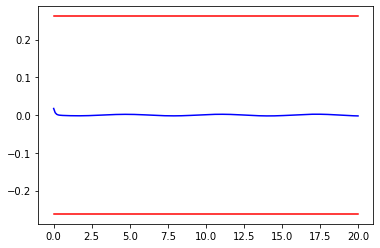

In [11]:
Tout,yout,xout = signal.lsim(total_sys, 
                             zero_input, 
                             Tin, 
                             X0=[0,0,start_pos/10])# начальная скорость нулевая, угол - start_pos
plt.plot(Tout, yout, 'b')
# покажем предельные допустимые отклонения красными линиями
limit = 15 / 180.0 * np.pi
plt.plot([0, TotalTime], [limit, limit], 'r')
plt.plot([0, TotalTime], [-limit, -limit], 'r')
plt.show()